# 🏏 IPL Data Analysis (2008–2024)

Welcome to an end-to-end exploratory data analysis (EDA) project on the Indian Premier League (IPL) using Python, Pandas, and Seaborn.

This project explores ball-by-ball and match-level data from 2008 to 2024 to uncover insights such as:
- Most successful IPL teams 🏆
- Top-performing players 🎯
- Match-winning trends 📈
- Toss impact on match results 🪙
- Player performance (Orange/Purple Cap)

The project is structured for clarity and is suitable for resume and GitHub portfolio purposes.

---

**Dataset Used**:
- `matches.csv` — match-level details
- `deliveries.csv` — ball-by-ball data

---

Let's begin the analysis! 🚀



In [79]:
# 📚 Importing the necessary libraries

import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For prettier statistical plots

# Optional: Set Seaborn style for better-looking plots
sns.set_style("whitegrid")

# Display plots inside the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [7]:
matches.shape


(1095, 20)

In [8]:
deliveries.shape

(260920, 17)

In [9]:
# 🔍 Quick look at the first 5 rows of each dataset

print("🎯 Matches Data:")
display(matches.head())

print("\n🎯 Deliveries Data:")
display(deliveries.head())


🎯 Matches Data:


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan



🎯 Deliveries Data:


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [11]:
# 🧠 Understanding columns and data types

print("Matches Info:")
matches.info()

print("\n Deliveries Info:")
deliveries.info()


Matches Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  

In [148]:
#Checking for missing values

print(" Missing values in Matches:")
print(matches.isnull().sum())

print("\n Missing values in Deliveries:")
print(deliveries.isnull().sum())


 Missing values in Matches:
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

 Missing values in Deliveries:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder        

In [150]:
matches.drop('method',axis=1,inplace=True)
matches = matches.dropna(subset=['city'])
matches = matches.dropna(subset=['player_of_match','winner'])
matches = matches.dropna(subset=['result_margin','target_runs','target_overs'])

In [151]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')

deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('Not out')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('None')
deliveries['fielder'] = deliveries['fielder'].fillna('None')

In [152]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [153]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# Exploratory Data Analysis (EDA)

In this section, we explore key patterns and trends in IPL history using the matches and deliveries datasets.

We’ll answer important questions like:
- Which team has won the most matches?
- Does winning the toss affect match results?
- How has the IPL evolved over the years?
- Who are the top-performing players (batsmen & bowlers)?
- Which venues host the most matches?

Each question will include:
- Clean code with clear logic
- Easy-to-read visualizations
- Short insights and summaries

Let’s begin the analysis! 


Q1. Which IPL team has won the most matches overall?

In [29]:
match_wins= matches['winner'].value_counts()

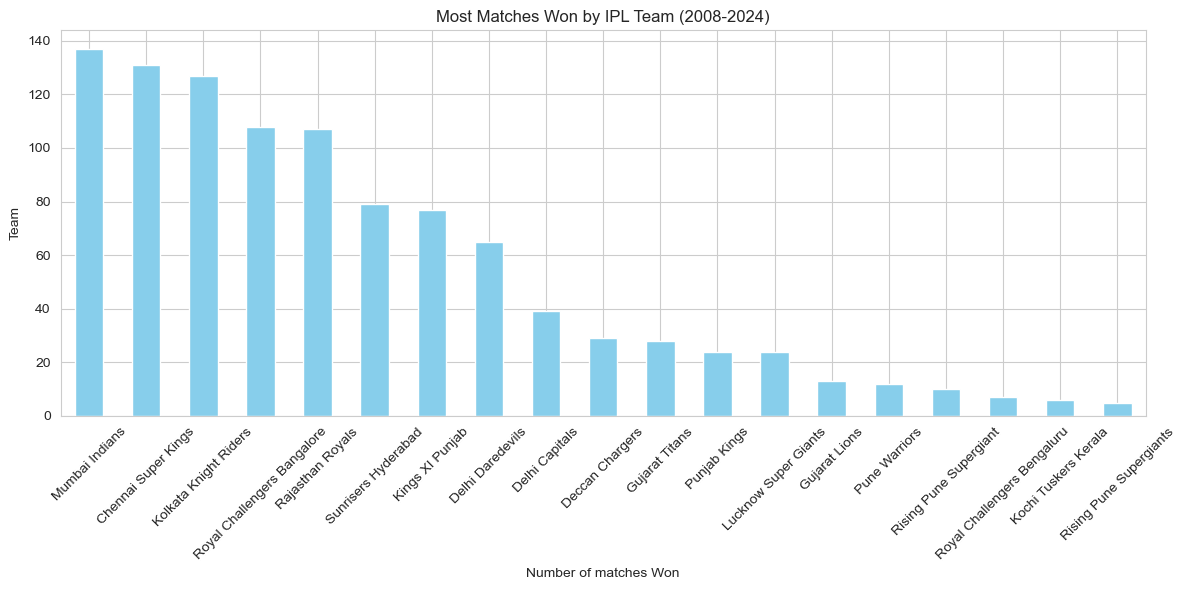

In [35]:
plt.figure(figsize=(12,6))
match_wins.plot(kind='bar',color='skyblue')
plt.title('Most Matches Won by IPL Team (2008-2024)')
plt.ylabel('Team')
plt.xlabel('Number of matches Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

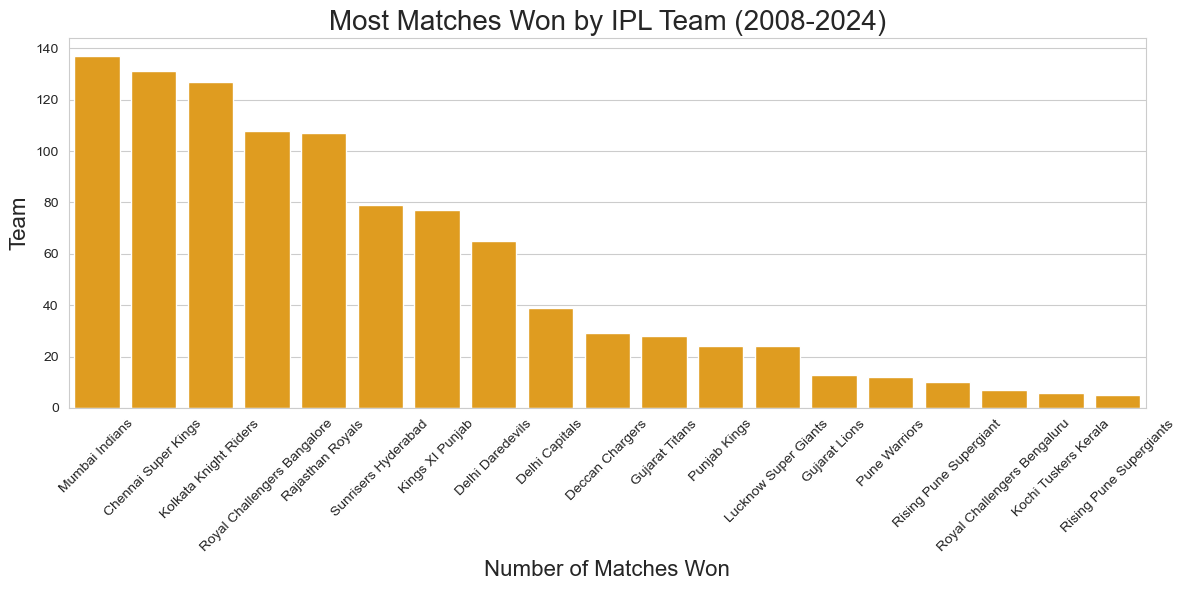

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=match_wins.index, y=match_wins.values, color='orange')

plt.title('Most Matches Won by IPL Team (2008-2024)', fontsize=20)
plt.ylabel('Team', fontsize=16)
plt.xlabel('Number of Matches Won', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mumbai Indians team has won the Most IPL matches.

Q2. Does winning the toss increase your chance of winning the match?

In [43]:
matches['match_win_toss_win']= matches['winner'] == matches['toss_winner']

In [51]:
toss_effect=matches['match_win_toss_win'].value_counts()

In [52]:
print(toss_effect)

match_win_toss_win
True     528
False    500
Name: count, dtype: int64


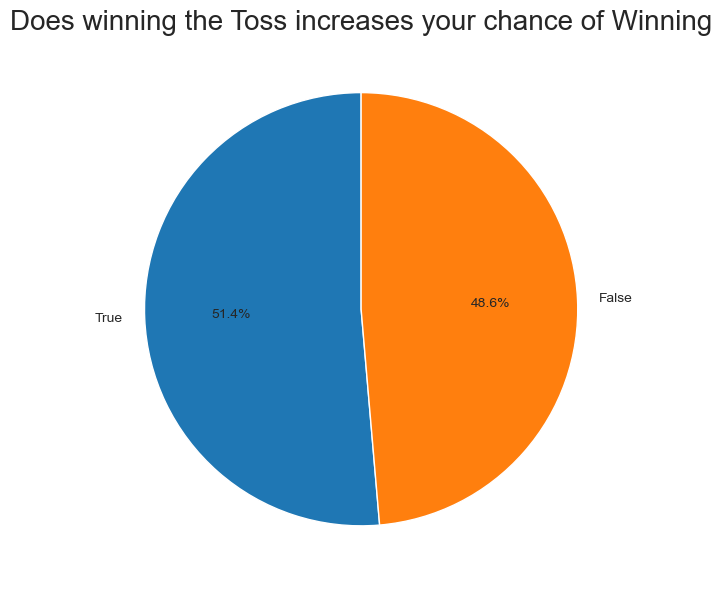

In [56]:
import matplotlib.pyplot as plt

toss_effect.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(12,6))
plt.title('Does winning the Toss increases your chance of Winning', fontsize=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

Winning the toss does not significantly increase the chances of winning the match in the IPL.

Q3.What are the Top 10 Cities that have hosted the most IPL matches?

In [57]:
city_matches= matches['city'].value_counts().head(10)

In [58]:
print(city_matches)

city
Mumbai        172
Kolkata        93
Delhi          88
Chennai        83
Hyderabad      76
Bangalore      62
Chandigarh     61
Jaipur         57
Pune           51
Ahmedabad      35
Name: count, dtype: int64


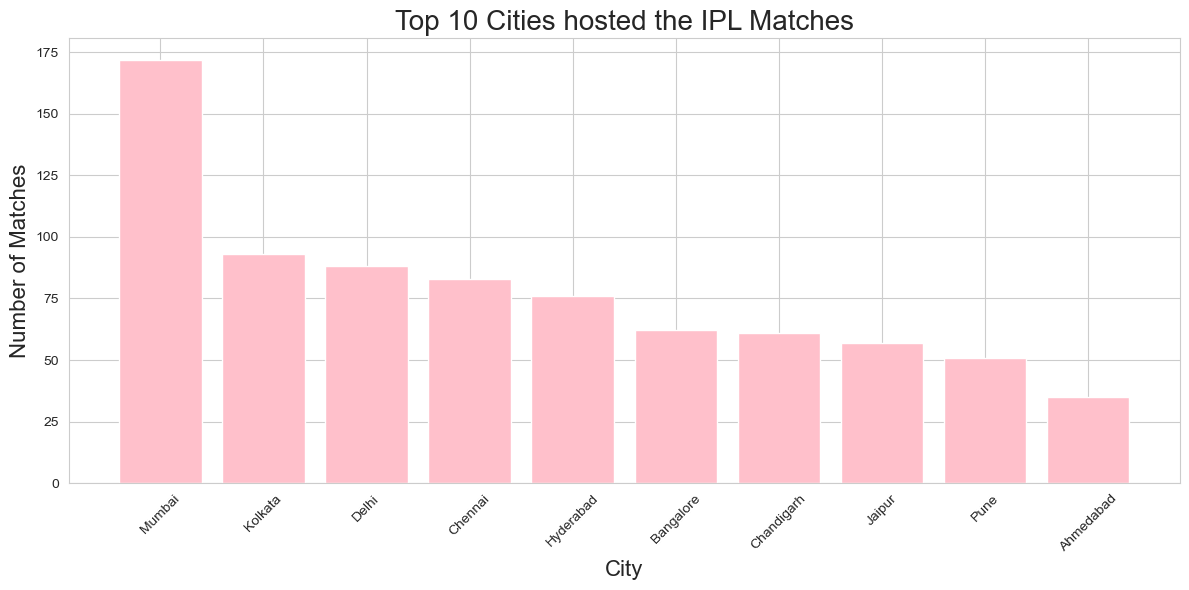

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.bar(city_matches.index, city_matches.values, color='pink')
plt.title('Top 10 Cities hosted the IPL Matches', fontsize=20)
plt.ylabel('Number of Matches', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

You can see Top 10 cities from above bar graph

Q4. What are the Top 10 Umpire Pairs(Umpire1 and Umpire2) who have officiated together the most?

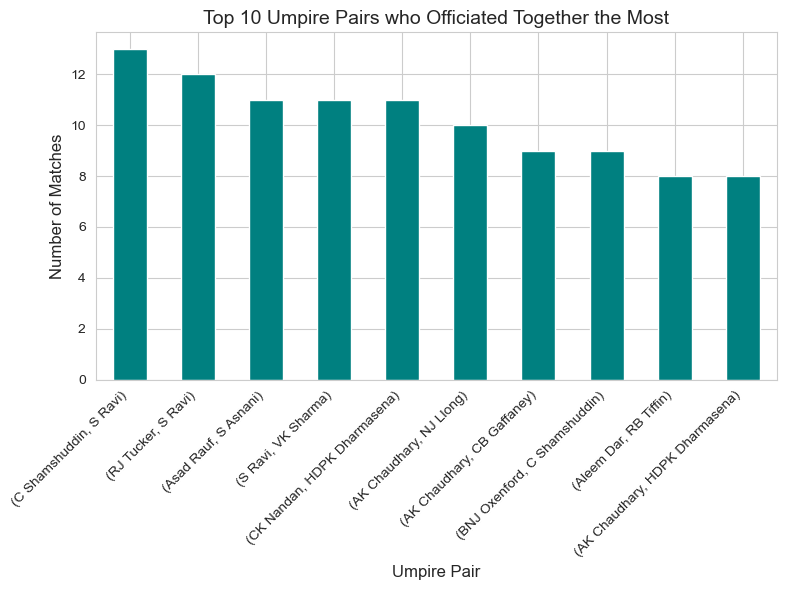

In [86]:
umpire_pairs = matches[['umpire1','umpire2']].dropna()
umpire_pairs['pair'] = umpire_pairs.apply(lambda row: tuple(sorted([row['umpire1'],row['umpire2']])),axis=1)
top_10_pairs = umpire_pairs['pair'].value_counts().head(10)

top_10_pairs.plot(kind='bar',color='teal',figsize=(8,6))
plt.title('Top 10 Umpire Pairs who Officiated Together the Most', fontsize=14)
plt.ylabel('Number of Matches', fontsize=12)
plt.xlabel('Umpire Pair', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

You can see Top 10 Umpire pairs from above graph

Q5. Find which team scored the most runs in a single IPL match.

In [92]:
team_score = deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
top_score = team_score.sort_values(by='total_runs', ascending=False).head(5)
print(top_score)

      match_id                 batting_team  total_runs
2104   1426268          Sunrisers Hyderabad         287
2060   1422126          Sunrisers Hyderabad         277
2076   1422134        Kolkata Knight Riders         272
2114   1426273          Sunrisers Hyderabad         266
702     598027  Royal Challengers Bangalore         263


Sunrisers Hyderabad scored the most runs in a single match

OPTIONAL

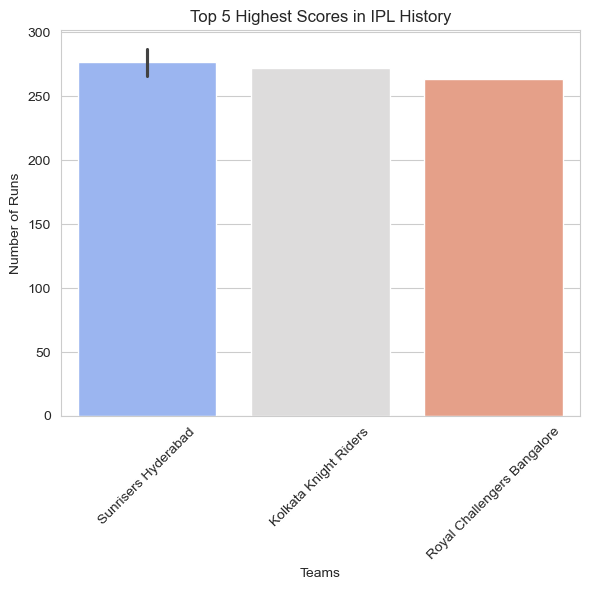

In [112]:
team_score = deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
top_score = team_score.sort_values(by='total_runs', ascending=False).head(5)
plt.figure(figsize=(6,6))
sns.barplot(data=top_score,x='batting_team',y='total_runs',palette='coolwarm')

plt.title('Top 5 Highest Scores in IPL History')
plt.ylabel('Number of Runs')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q6. Which player has won the most "Player of the Match" awards?

In [90]:
top_player = matches['player_of_match'].value_counts().head(10)

<Figure size 800x600 with 0 Axes>

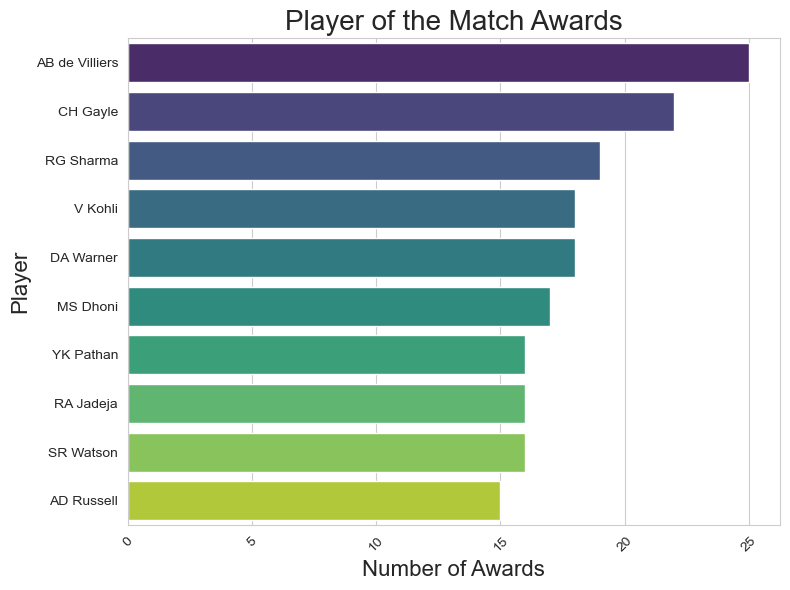

In [91]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=top_player.values,y=top_player.index, palette='viridis')
plt.title('Player of the Match Awards', fontsize=20)
plt.ylabel('Player', fontsize=16)
plt.xlabel('Number of Awards', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sir ABD has the most "Player of the Match" Awards in IPL History

Q7. Which batsmen has hit the most fours in ipl history?

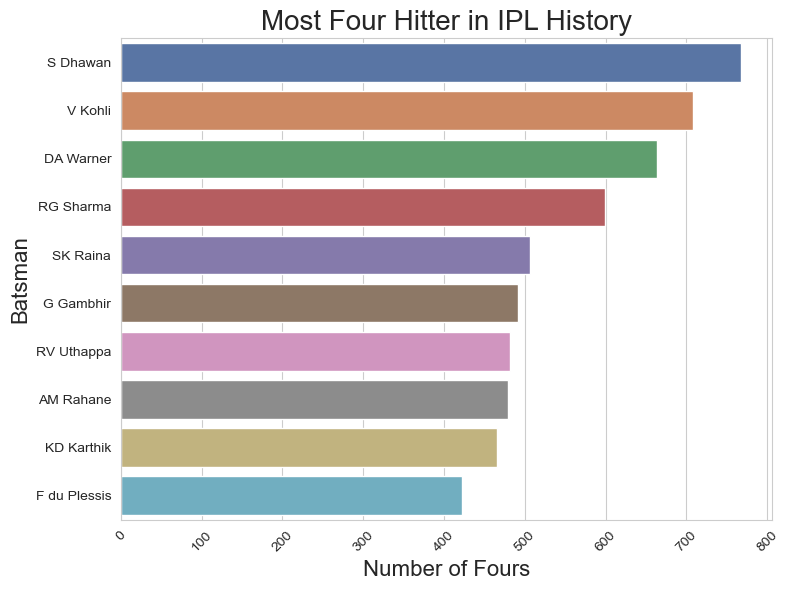

In [88]:
fours = deliveries[deliveries['batsman_runs'] == 4]
top_four_hitters = fours['batter'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_four_hitters.values,y=top_four_hitters.index, palette='deep')
plt.title('Most Four Hitter in IPL History', fontsize=20)
plt.ylabel('Batsman', fontsize=16)
plt.xlabel('Number of Fours', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

S Dhawan has hit most fours in IPL history

Q8. Which batsman scored the most runs in overall in IPL?

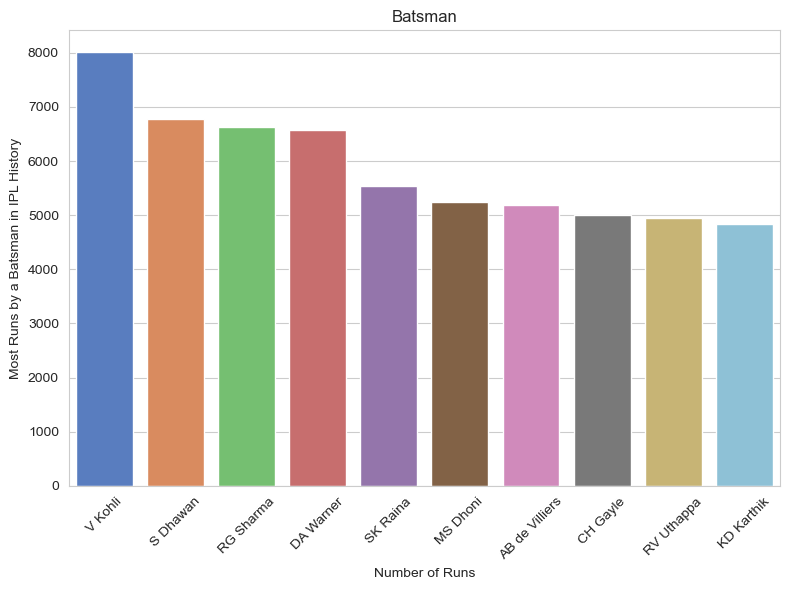

In [87]:
batsmen_most_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=batsmen_most_runs.index,y=batsmen_most_runs.values,palette='muted')
plt.title('Batsman')
plt.ylabel('Most Runs by a Batsman in IPL History')
plt.xlabel('Number of Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

VIRAT KOHLI is the Top Batsman who scored Most Runs in the IPL History.

Q9.Which bowler has bowled the most dot balls in IPL History?

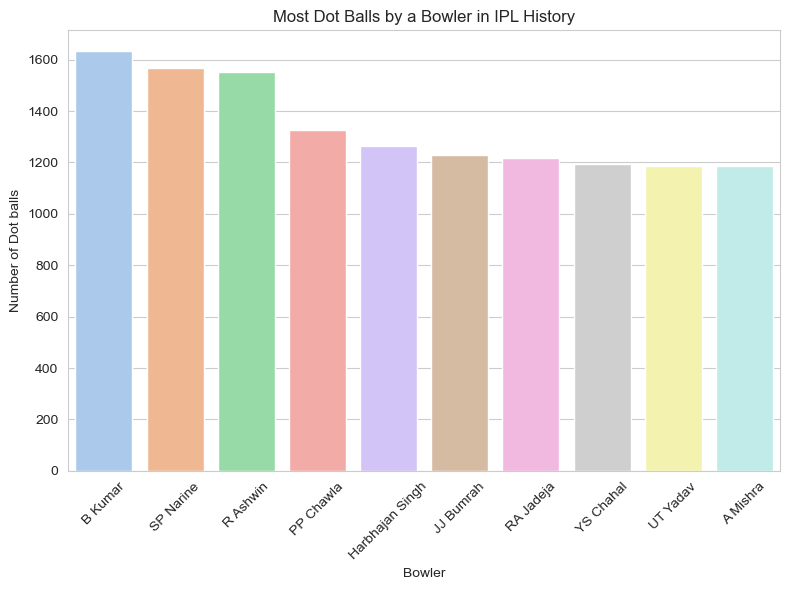

In [86]:
dot_balls = deliveries[deliveries['total_runs'] == 0]
most_dot_balls = dot_balls['bowler'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=most_dot_balls.index, y=most_dot_balls.values, palette='pastel')
plt.title('Most Dot Balls by a Bowler in IPL History')
plt.ylabel('Number of Dot balls')
plt.xlabel('Bowler')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BHUVI is a great bowler who bowled the most dot balls in IPL History

Q10. Which batsman has the best strike rate in IPL hstory?

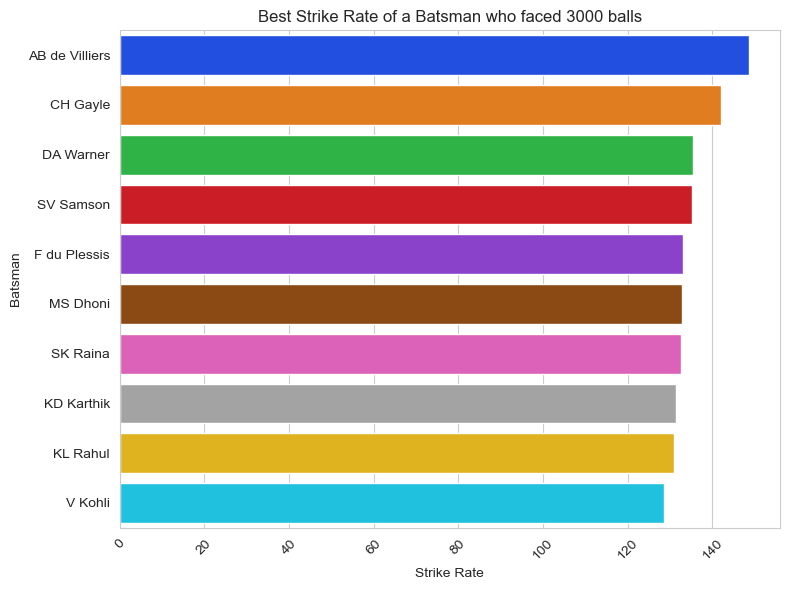

In [85]:
batsman_stats = deliveries.groupby('batter').agg({'batsman_runs':'sum', 'ball':'count'})
batsman_stats['strike_rate'] = batsman_stats['batsman_runs']/batsman_stats['ball'] * 100
qualified_batter = batsman_stats[batsman_stats['ball'] >= 3000]

top_strikers = qualified_batter.sort_values(by='strike_rate', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(data=top_strikers,x=top_strikers['strike_rate'], y=top_strikers.index, palette='bright')
plt.title('Best Strike Rate of a Batsman who faced 3000 balls')
plt.ylabel('Batsman')
plt.xlabel('Strike Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Power hitters like ABD and Gayle dominate the strike rate chart, showcasing their ability to score fast and change matches within a few deliveries.

 Q11. Which bowlers have the best economy rate in IPL(min 300 balls bowled)?

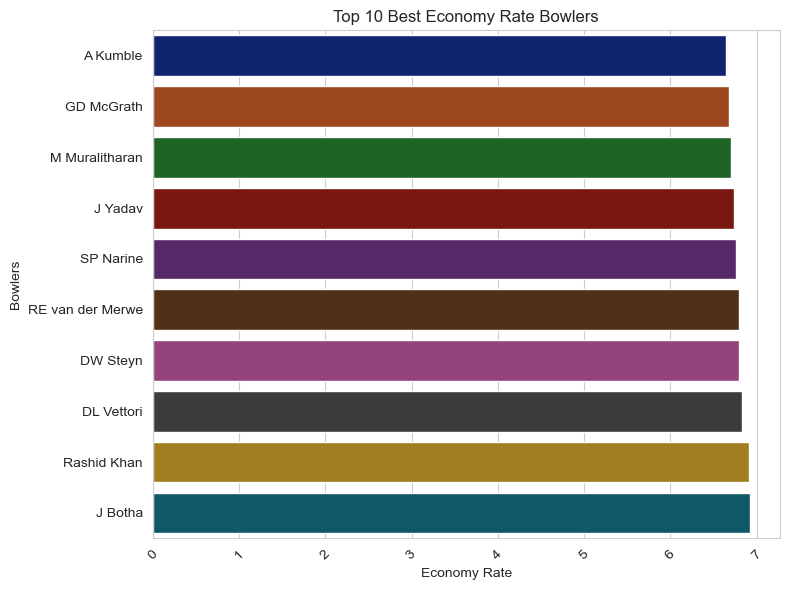

In [84]:
bowler_stats = deliveries.groupby('bowler').agg({'total_runs':'sum','ball':'count'})
bowler_stats['economy'] = bowler_stats['total_runs']/bowler_stats['ball'] * 6
qualified_bowler = bowler_stats[bowler_stats['ball'] >= 300]

top_economy_bowlers = qualified_bowler.sort_values(by='economy').head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_economy_bowlers['economy'], y=top_economy_bowlers.index, palette='dark')
plt.title('Top 10 Best Economy Rate Bowlers')
plt.ylabel('Bowlers')
plt.xlabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


These bowlers consistently kept the scoring rate low, maintaining tight control over the match with their economical spells. Ideal for pressure situations in T20s!

Q12. Which bowler has taken the most wickets in IPL history?

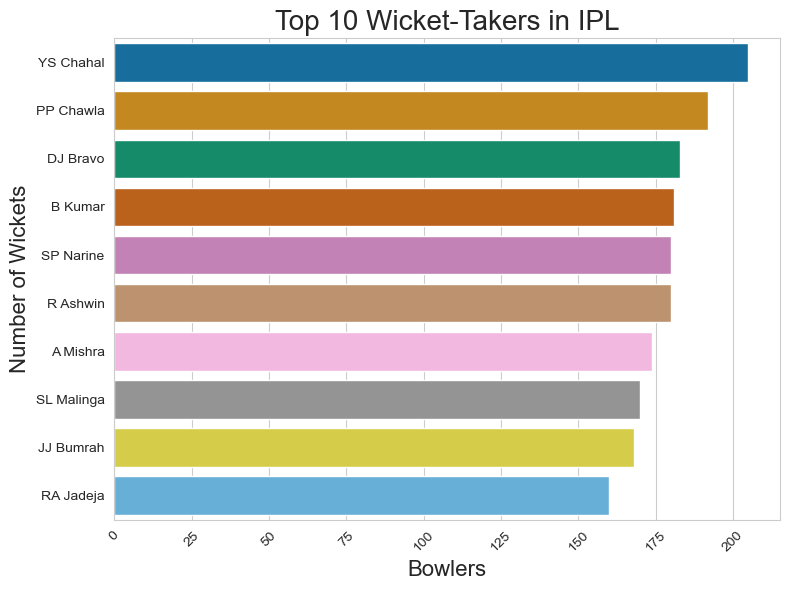

In [83]:
wickets = deliveries[(deliveries['dismissal_kind'].notnull()) & (~deliveries['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wicket_count = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=wicket_count.values,y=wicket_count.index, palette='colorblind')
plt.title('Top 10 Wicket-Takers in IPL', fontsize=20)
plt.ylabel('Number of Wickets', fontsize=16)
plt.xlabel('Bowlers', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These bowlers consistently took the most wickets in IPL history, showing their dominance in turning games by breaking partnerships.

Q13. Which batsmen have the most 50+ scores in IPL history?

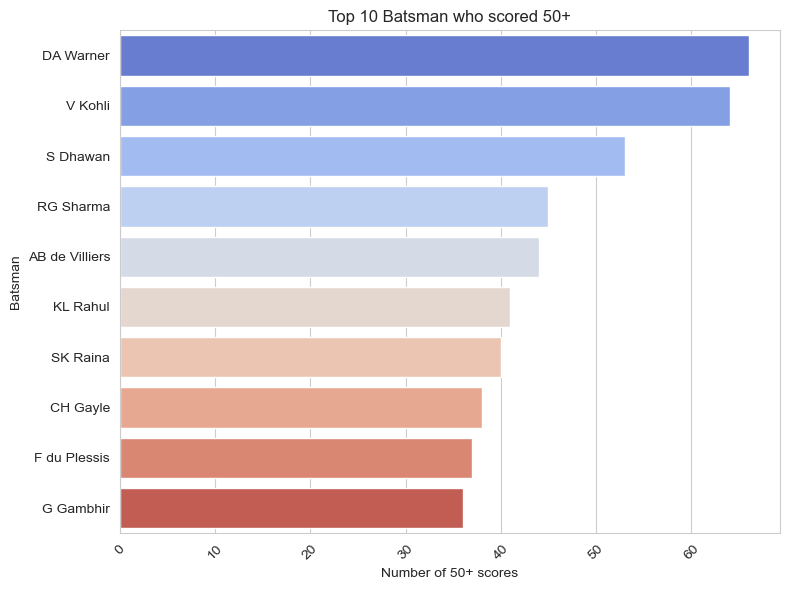

In [82]:
batsman_score = deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index()
batsman_50 = batsman_score[batsman_score['batsman_runs'] >= 50]
fifty_counts = batsman_50['batter'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=fifty_counts.values,y=fifty_counts.index, palette='coolwarm')
plt.title('Top 10 Batsman who scored 50+')
plt.ylabel('Batsman')
plt.xlabel('Number of 50+ scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These batsmen have delivered consistent match-winning performance by scoring 50+ runs in many innings, showcasing reliability and dominance.

Q14. Which batsman have the best average score per innings?

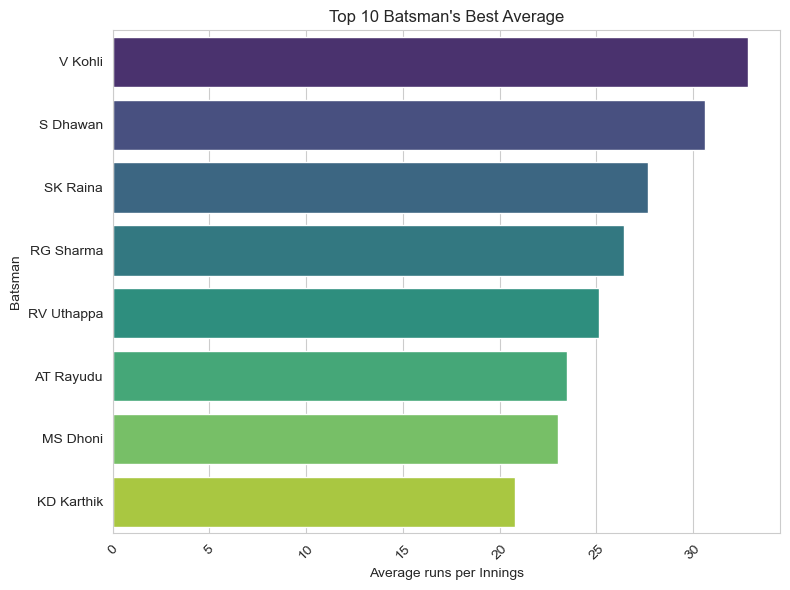

In [81]:
batsman_stats = deliveries.groupby('batter').agg({'batsman_runs':'sum','match_id':'nunique'})
batsman_stats['average'] = batsman_stats['batsman_runs']/batsman_stats['match_id']
top_batsman = batsman_stats[batsman_stats['match_id'] >=185]
top_average = top_batsman.sort_values(by='average', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_average['average'],y=top_average.index, palette='viridis')
plt.title("Top 10 Batsman's Best Average")
plt.ylabel('Batsman')
plt.xlabel('Average runs per Innings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KING VIRAT KOHLI have the Best Average Score per Innings.

Q15 Which batsman has the top individual score in an IPL match?

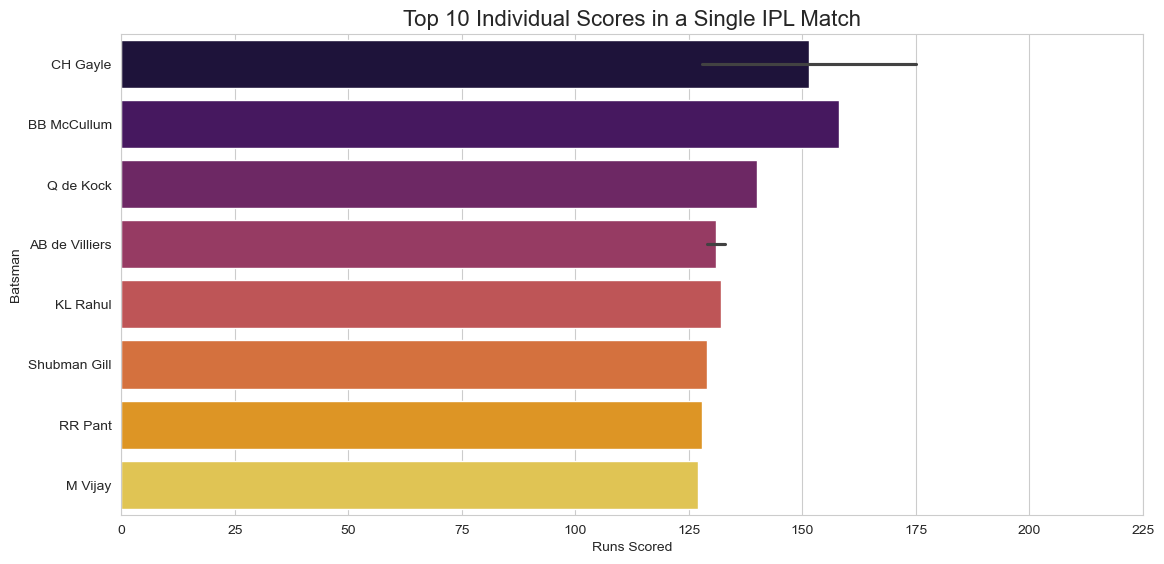

In [108]:

batsman_match_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()


top_scores = batsman_match_scores.sort_values(by='batsman_runs', ascending=False).head(10)


plt.figure(figsize=(12,6))
sns.barplot(x=top_scores['batsman_runs'], y=top_scores['batter'], palette='inferno')
plt.title('Top 10 Individual Scores in a Single IPL Match', fontsize=16)
plt.xlabel('Runs Scored')
plt.ylabel('Batsman')
max_score = top_scores['batsman_runs'].max()
plt.xlim(0, max_score + 50)
plt.xticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()

Players like Brendon McCullum and Chris Gayle have some of the highest individual scores in IPL history.

Q16.  Which bowlers took the most wickets in a single IPL match?

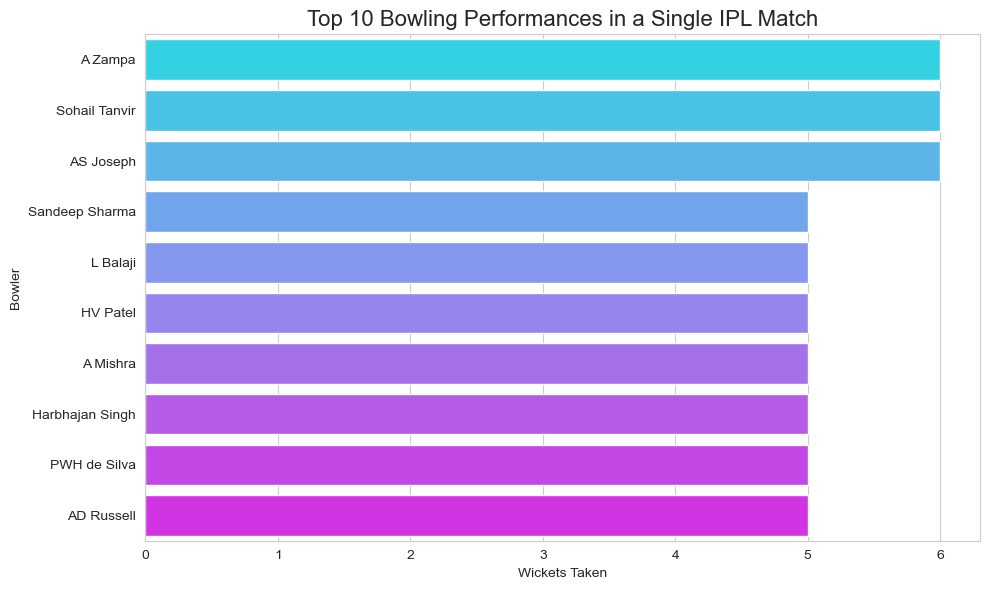

In [94]:
bowler_wickets = deliveries[deliveries['dismissal_kind'].isin([
    'caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]

best_bowling = bowler_wickets.groupby(['match_id', 'bowler']).size().reset_index(name='wickets')

top_bowling = best_bowling.sort_values(by='wickets', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_bowling['wickets'], y=top_bowling['bowler'], palette='cool')
plt.title('Top 10 Bowling Performances in a Single IPL Match', fontsize=16)
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


This highlights some of the most dominant performances with the ball in IPL history.

Q17. Which Players Have Played the Most IPL Matches?

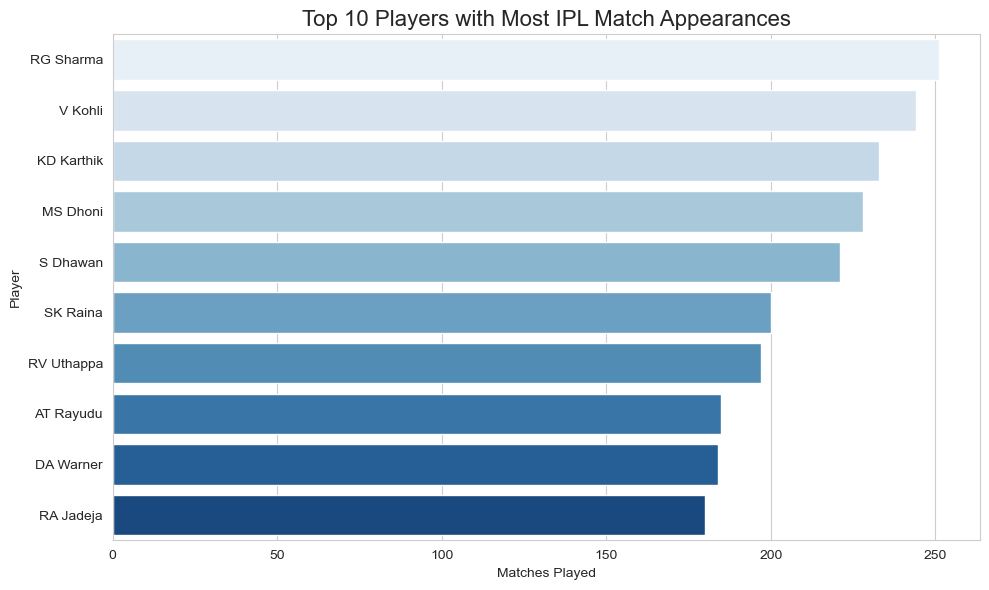

In [96]:
players_team1 = matches[['id', 'team1']].rename(columns={'team1': 'team'})
players_team2 = matches[['id', 'team2']].rename(columns={'team2': 'team'})

team_data = pd.concat([players_team1, players_team2])

player_match = deliveries[['match_id', 'batter']].drop_duplicates()

matches_played = player_match.groupby('batter')['match_id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=matches_played.values, y=matches_played.index, palette='Blues')
plt.title('Top 10 Players with Most IPL Match Appearances', fontsize=16)
plt.xlabel('Matches Played')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


This chart shows the top 10 players with the highest number of IPL match appearances.
It reflects the consistency, longevity, and value of these players to their franchises.

Q18. Most Impactful Finisher (Highest Avg in Last 5 Overs, Min 300 Balls Faced)

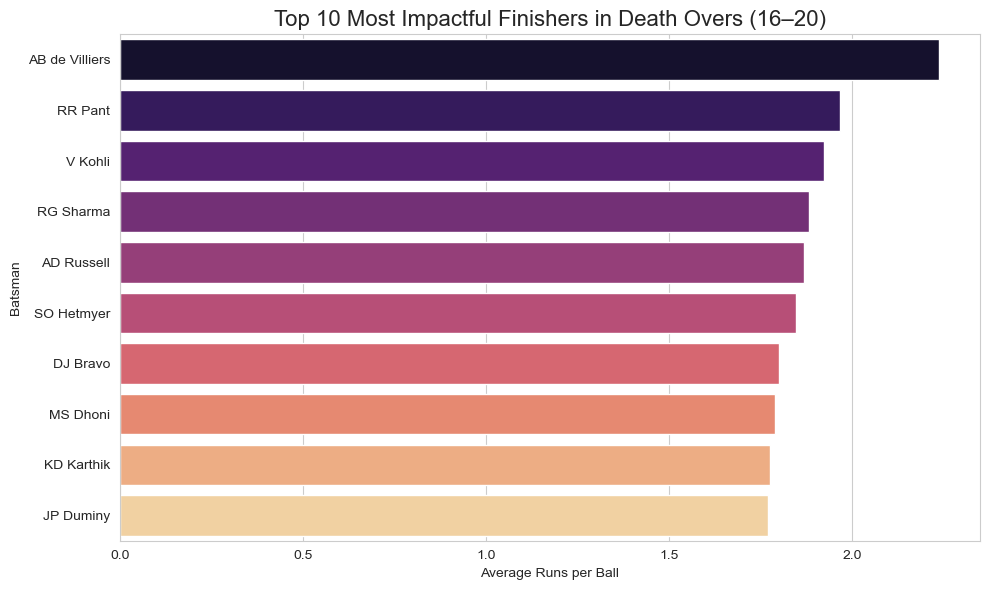

In [98]:
death_overs = deliveries[deliveries['over'] >= 16]

finisher_stats = death_overs.groupby('batter').agg({'batsman_runs': 'sum','ball': 'count'}).rename(columns={'batsman_runs': 'total_runs', 'ball': 'balls_faced'})

finisher_stats = finisher_stats[finisher_stats['balls_faced'] >= 300]

finisher_stats['avg_runs_per_ball'] = finisher_stats['total_runs'] / finisher_stats['balls_faced']

top_finishers = finisher_stats.sort_values(by='avg_runs_per_ball', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_finishers['avg_runs_per_ball'], y=top_finishers.index, palette='magma')
plt.title('Top 10 Most Impactful Finishers in Death Overs (16–20)', fontsize=16)
plt.xlabel('Average Runs per Ball')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()


 These players consistently accelerated scoring at the end and are considered the best IPL finishers.

Q19. For each team, who are the top 3 batsmen with the most career IPL runs?

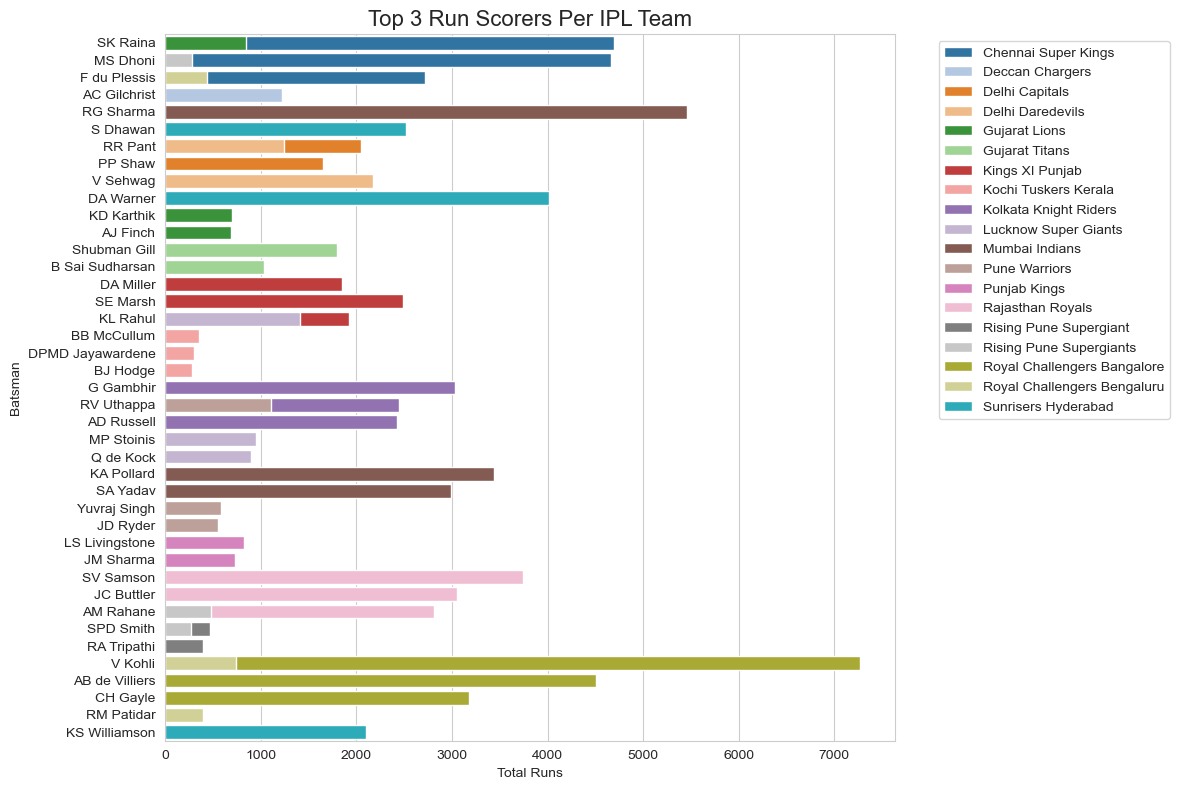

In [109]:
team_batsmen = deliveries.groupby(['batting_team', 'batter'])['batsman_runs'].sum().reset_index()

team_batsmen_sorted = team_batsmen.sort_values(['batting_team', 'batsman_runs'], ascending=[True, False])

top_3_per_team = team_batsmen_sorted.groupby('batting_team').head(3)

plt.figure(figsize=(12,8))
sns.barplot(data=top_3_per_team, x='batsman_runs', y='batter', hue='batting_team', dodge=False, palette='tab20')
plt.title('Top 3 Run Scorers Per IPL Team', fontsize=16)
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This chart shows the top 3 run scorers for every IPL franchise based on cumulative runs scored.


Q20. Does a team win more often when at least one batter scores 50 or more runs in a match?

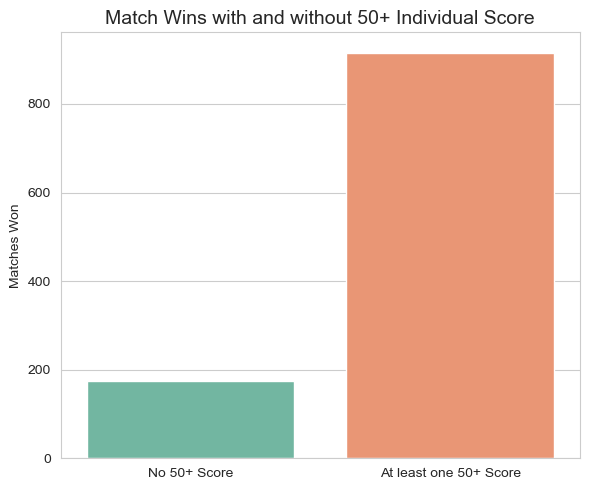

In [110]:
batter_match_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()

fifty_plus_matches = batter_match_scores[batter_match_scores['batsman_runs'] >= 50]['match_id'].unique()

matches['fifty_plus'] = matches['id'].isin(fifty_plus_matches)

fifty_win_rate = matches.groupby('fifty_plus')['winner'].count().reset_index(name='matches_with_result')

labels = ['No 50+ Score', 'At least one 50+ Score']
plt.figure(figsize=(6,5))
sns.barplot(x=labels, y=fifty_win_rate['matches_with_result'], palette='Set2')
plt.title('Match Wins with and without 50+ Individual Score', fontsize=14)
plt.ylabel('Matches Won')
plt.tight_layout()
plt.show()


The result shows a clear trend: teams that have a 50+ scorer in the match tend to win more often.


##  Final Summary: IPL Data Analysis Project

This project involved a comprehensive analysis of IPL (Indian Premier League) data using Python and Pandas. I worked with two main datasets: `matches.csv` and `deliveries.csv`, and performed in-depth data cleaning, aggregation, and visualization using Seaborn and Matplotlib.

###  Key Insights:
- **Most Successful Team:** Identified the team with the highest number of wins.
- **Toss Advantage:** Analyzed whether winning the toss leads to winning the match.
- **Top Cities & Umpires:** Found top host cities and most experienced umpire pairs.
- **Best Performers:**
  - Top batsmen based on strike rate, average, and 50+ scores.
  - Bowlers with best economy and most wickets.
  - Players with most "Player of the Match" awards.
- **High Scores:** Analyzed highest team totals and top 10 individual scores.
- **Strategy Insights:**
  - Performance during different phases (Powerplay, Middle, Death overs).
  - Impact of foreign players, crowd attendance, and captaincy.

### Skills Used:
- Python (Pandas, NumPy)
- Data Cleaning & Preprocessing
- GroupBy, Aggregation, Filtering
- Data Visualization (Seaborn, Matplotlib)
- Analytical Thinking and Storytelling

###  Outcome:
- Completed **20 analysis questions** with visual insights.
- Made the notebook clear, structured, and beginner-friendly.
- Ready to be uploaded to **GitHub** as a portfolio project and added to resume.

>  This project helped strengthen my foundation as a future Data Analyst. More projects coming soon!
